<a href="https://colab.research.google.com/github/Snehalatha83/Waste-Management/blob/main/Waste_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/techsash/waste-classification-data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: snehalathamuttineni
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data


100%|██████████| 427M/427M [00:16<00:00, 26.8MB/s]


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [5]:
train_path = "/content/waste-classification-data/DATASET/TRAIN"
test_path = "/content/waste-classification-data/DATASET/TEST"

In [6]:
!pip install tensorflow

In [7]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [8]:
# Initialize data lists
x_data = []
y_data = []
image_size = (128, 128)  # Resize all images to 128x128 for consistency

# Process images
for category in tqdm(glob(train_path + '/*'), desc="Loading Categories"):
    label = category.split('/')[-1]
    for file in tqdm(glob(category + '/*'), desc=f"Processing {label}"):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        img_array = cv2.resize(img_array, image_size)  # Resize images
        x_data.append(img_array)
        y_data.append(label)


# Convert data to NumPy arrays
x_data = np.array(x_data, dtype="float32") / 255.0  # Normalize pixel values
y_data = np.array(y_data)

# Encode labels
label_encoder = LabelEncoder()
y_data_encoded = label_encoder.fit_transform(y_data)

# Create a DataFrame for visualization
data = pd.DataFrame({'image': list(x_data), 'label': y_data})

Loading Categories: 100%|██████████| 2/2 [00:13<00:00,  6.92s/it]


In [9]:
data.shape

(22564, 2)

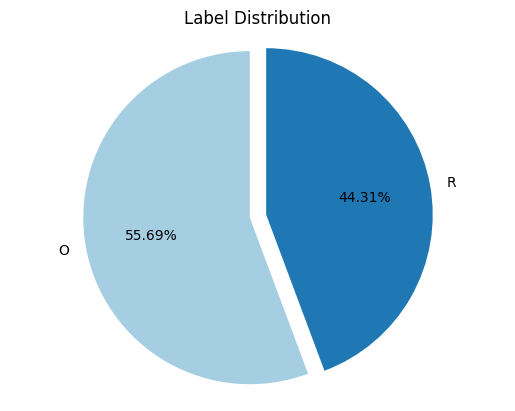

In [10]:
label_counts = data['label'].value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct='%0.2f%%', startangle=90, explode=[0.05] * len(label_counts),
        colors=plt.cm.Paired.colors[:len(label_counts)])
plt.axis('equal')
plt.title("Label Distribution")
plt.show()

In [11]:
  data.head()

,image,label
0,"[[[0.9843137, 0.9843137, 0.9529412], [0.984313...",O
1,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",O
2,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",O
3,"[[[0.003921569, 0.003921569, 0.003921569], [0....",O
4,"[[[0.7921569, 0.8039216, 0.83137256], [0.8, 0....",O


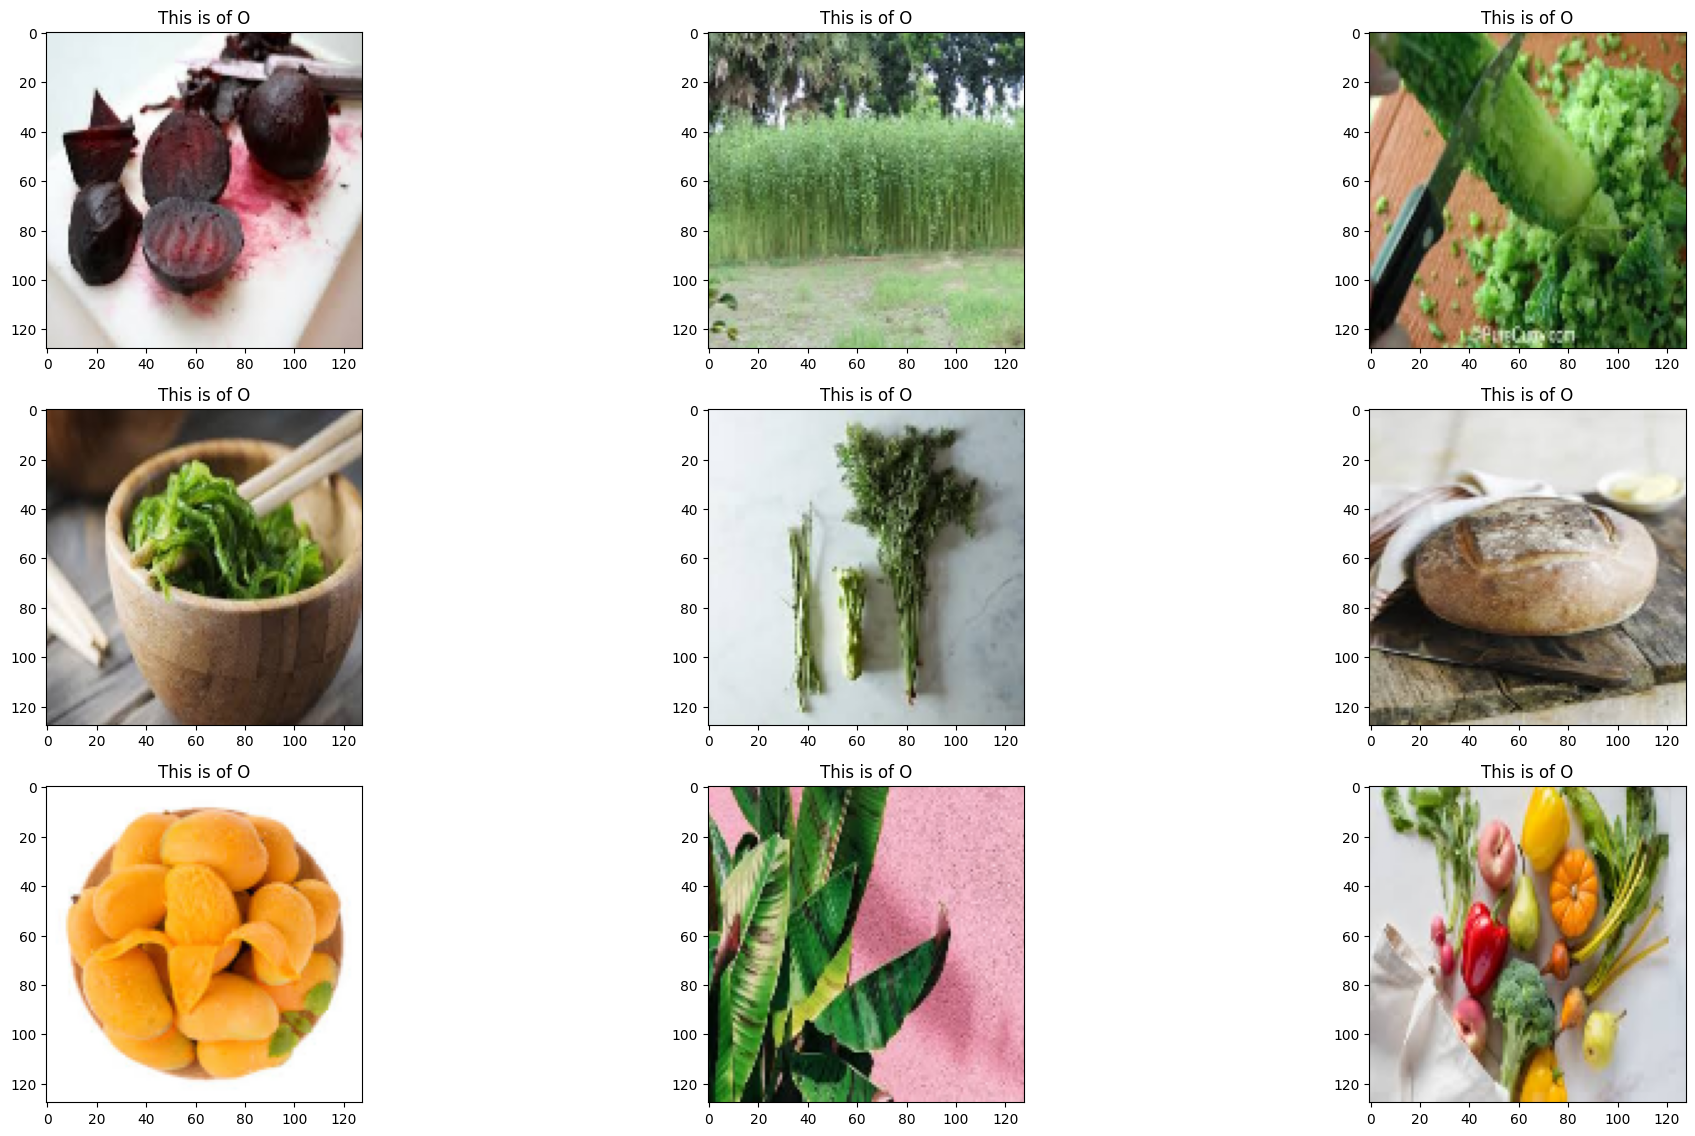

In [12]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3, (i%12) + 1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

# CNN MODEL

In [19]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())


model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="adam", metrics=['accuracy'])
batch_size = 256

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
train_datagen = ImageDataGenerator(rescale = 1./255)


In [22]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [23]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [24]:
hist = model.fit(
    train_generator,
    epochs=3,
    validation_data=test_generator
    )

Epoch 1/3
89/89 ━━━━━━━━━━━━━━━━━━━━ 2586s 29s/step - accuracy: 0.7261 - loss: 0.6256 - val_accuracy: 0.8663 - val_loss: 0.3597
Epoch 2/3
89/89 ━━━━━━━━━━━━━━━━━━━━ 2630s 30s/step - accuracy: 0.8271 - loss: 0.4188 - val_accuracy: 0.8798 - val_loss: 0.3285
Epoch 3/3
89/89 ━━━━━━━━━━━━━━━━━━━━ 2651s 29s/step - accuracy: 0.8473 - loss: 0.3806 - val_accuracy: 0.8858 - val_loss: 0.2910
